In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import cm
import matplotlib.colors as colors

import os
import sys
from models.mb_agent.mb_surnor import import_params_surnor
from fitting_behavior.off_policy.offpolicy_nor import offpolicy_nor
from fitting_behavior.mle.LL_nor import ll_nor

from fitting_behavior.off_policy.offpolicy_nac import offpolicy_nac
from fitting_behavior.mle.LL_nAC import ll_nac

from fitting_behavior.off_policy.offpolicy_hyb2 import offpolicy_hyb2
from fitting_behavior.mle.LL_hybrid import ll_hybrid
from fitting_behavior.mle.LL_hybrid2 import ll_hybrid2

import fitting_behavior.optimization.base_params_opt as bpo
import fitting_behavior.optimization.auxiliary_opt as auxo
import utils.saveload as sl
import utils.visualization as vis
import utils.hnov as hn
import utils.tree_env as tree

In [2]:
def plot_nov(rec_all,labels,cols,algname,plot_field,mark_points=[],figsize=(5,1.8)):
    f,ax = plt.subplots(1,1,figsize=figsize)
    for mp in mark_points:
        ax.axvline(x=mp,color='grey',ls='-',lw=1,alpha=1)
    for ii, rec in enumerate(rec_all):
        # ax.scatter(rec['time'],rec[plot_field],label=labels[ii],color=cols[ii])
        ax.plot(rec['time'][1:],rec[plot_field][1:],'-',color=cols[ii],label=labels[ii])
    ax.set_xticks(np.arange(1,rec['time'].max()+1))
    ax.set_xticklabels([f'{ii}' if ii%2==0 else '' for ii in np.arange(1,rec['time'].max()+1)])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('Time steps in maze')
    ax.set_ylabel('Novelty signal')
    ax.legend(ncol=1,loc='lower right',bbox_to_anchor=(1.4,0),frameon=False,handlelength=0.8,handletextpad=0.3)
    # ax.set_title(f'Novelty signals of {algname} along test path')
    return f,ax

def plot_fam(rec_all,labels,cols,algname,plot_field):
    f,ax = plt.subplots(1,1,figsize=(5,5))
    for ii, rec in enumerate(rec_all):
        ax.scatter(rec['time'],rec[plot_field],label=labels[ii],color=cols[ii])
        ax.plot(rec['time'],rec[plot_field],'--',color=cols[ii])
    ax.axvline(x=np.where(rec['state']==64)[0],color='k',ls=':')
    ax.set_xlabel('Time steps in maze')
    ax.set_ylabel('Familiarity of next state')
    ax.legend()
    ax.set_title(f'Novelty signals of {algname} along test path')

In [5]:
# Set based path to project directory
base_path = '/Users/sbecker/Projects/sim_nov/'

# Construct toy example data
sequence = pd.DataFrame({'state':       np.array([0,1,2,4,8,16,32,64,32,65,32,16,33,16,8,4,2,5,2,1],dtype=int), 
                         'action':      np.array([1,2,2,2,2,2,2,0,3,0,0,3,0,0,0,0,3,0,0,3],dtype=int),
                         'next_state':  np.array([1,2,4,8,16,32,64,32,65,32,16,33,16,8,4,2,5,2,1,3],dtype=int)
                         })
# actions: 0 = backward, 1 = forward, 2 = left, 3 = right
mark_points = [1,
               9,
               12,
               17,
               20]
mark_labels = ['First entry into maze',
               'First visit of new C6 comp.',
               'First visit of new C5 comp.',
               'First visit of new C2 comp.',
               'First visit of new C1 comp.']


# Count-based novelty agent (off-policy) with different levels of leakiness

Leakiness of counts: 1.
Leakiness of counts: 0.9.
Leakiness of counts: 0.5.


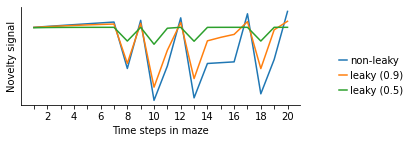

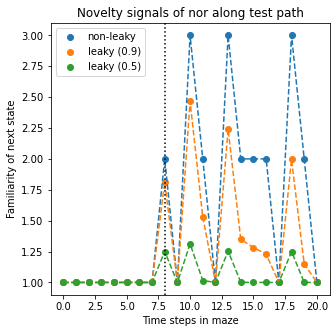

In [13]:
####### nor/nac/hyb model: off-policy (comp. with nor) ###################
comp_algs = ['nor']
k_alph = [1,0.9,0.5]
labels = ['non-leaky','leaky (0.9)','leaky (0.5)']
cols = ['C0','C1','C2']

rec_all = []
for ii, cc in enumerate(comp_algs):
    if cc=='nor':
        # Load default parameters for nor model
        params = bpo.base_params_mbnortree_exp.copy()
        params_surnor = import_params_surnor(path=f'{base_path}src/models/mb_agent/')
        params.update(params_surnor)

        rec_all_nor = []
        for ka in k_alph:
            # Simulate leaky nor model (off-policy) + extract novelty signals
            params['k_alph'] = ka
            print(f'Leakiness of counts: {params["k_alph"]}.')
            rec_nor, _ = offpolicy_nor(params,sequence,rec_counts=True)
            rec_all_nor.append(rec_nor)

        # Plot novelty/familiarity signals of leaky vs. non-leaky along path
        plot_nov(rec_all_nor,labels,cols,'nor',plot_field='nov_s_new')
        plot_fam(rec_all_nor,labels,cols,'nor',plot_field='counts_s_new')

# Similarity-based novelty agent (off-policy) with different levels of leakiness

/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env = env.append(add,ignore_index=True)
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env = env.append(add,ignore_index=True)
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env = env.append(add,ignore_index=True)
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env = env.append(add,ignore_index=True)
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarn

Leakiness of counts: 1.
Leakiness of counts: 0.9.
Leakiness of counts: 0.5.


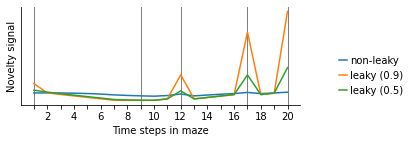

In [14]:
####### nor/nac/hyb model: off-policy (comp. with nor) ###################
comp_algs = ['nor']
k_alph = [1,0.9,0.5]
update_type = ['var','fix','fix']
labels = ['non-leaky','leaky (0.9)','leaky (0.5)']
cols = ['C0','C1','C2']

rec_all = []
for ii, cc in enumerate(comp_algs):
    if cc=='nor':
        # Load default parameters for nor model
        params = bpo.baseparams_h1mbnor([5],notrace=False,center=False,center_type='box',update_type=None)
        params_surnor = import_params_surnor(path=f'{base_path}src/models/mb_agent/')
        params.update(params_surnor)

        rec_all_nor = []
        for ka,ut in zip(k_alph,update_type):
            # Simulate leaky nor model (off-policy) + extract novelty signals
            params['k_alph'] = ka
            params['h']['k_alph'] = ka
            params['h']['update_type'] = ut
            print(f'Leakiness of counts: {params["k_alph"]}.')
            rec_nor, _ = offpolicy_nor(params,sequence,rec_weights=False)
            rec_all_nor.append(rec_nor)

        # Plot novelty/familiarity signals of leaky vs. non-leaky along path
        plot_nov(rec_all_nor,labels,cols,'nor',plot_field='nov_s_new',mark_points=mark_points)
        # plot_fam(rec_all_nor,labels,cols,'nor',plot_field='counts_s_new')

# Plot count-based vs. different levels of similarity-based (Figure 3D)

## Non-leaky models (Figure 3D)

In [15]:
####### nor/nac/hyb model: off-policy (comp. with nor) ###################
k_alph = [1]
update_type = ['var']

for ka, ut in zip(k_alph,update_type):
    hlevels = [2,5]
    comp_algs = ['nor'] + ['hnor']*len(hlevels)
    labels = ['counts'] + [f'comp. (l={h})' for h in hlevels]
    cmap = plt.cm.get_cmap('Reds')
    cnorm = colors.Normalize(vmin=0, vmax=len(hlevels))
    smap = cm.ScalarMappable(norm=cnorm, cmap=cmap)
    cb = [smap.to_rgba(len(hlevels)-i) for i in range(len(hlevels))]
    cols = [vis.prep_cmap(name='Blues',num=len(np.arange(1,7)))[1]] + cb
    # vis.prep_cmap(name='Reds',num=len(hlevels))
    # [vis.prep_cmap(name='Reds',num=len(np.arange(1,7)))[ii-1] for ii in hlevels]

    rec_all = []
    for ii, cc in enumerate(comp_algs):
        if cc=='nor':
            # Load default parameters for nor model
            params = bpo.base_params_mbnortree_exp.copy()
            params_surnor = import_params_surnor(path=f'{base_path}src/models/mb_agent/')
            params.update(params_surnor)

            # Simulate leaky nor model (off-policy) + extract novelty signals
            params['k_alph'] = ka
            rec_nor, _ = offpolicy_nor(params,sequence,rec_counts=True)
            rec_all.append(rec_nor)

        elif cc=='hnor':
            # Load default parameters for nor model
            params = bpo.baseparams_h1mbnor([hlevels[ii-1]],notrace=False,center=False,center_type='box',update_type=None)
            params_surnor = import_params_surnor(path=f'{base_path}src/models/mb_agent/')
            params.update(params_surnor)

            # Simulate leaky nor model (off-policy) + extract novelty signals
            params['k_alph'] = ka
            params['h']['k_alph'] = ka
            params['h']['update_type'] = ut
            rec_nor, _ = offpolicy_nor(params,sequence,rec_weights=False)
            rec_all.append(rec_nor)

/var/folders/wv/411_cg655539_0t6mhrytx1w0000gp/T/ipykernel_6391/2492001901.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Reds')
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env = env.append(add,ignore_index=True)
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env = env.append(add,ignore_index=True)
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env =

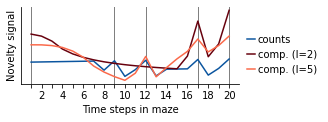

In [16]:
# Plot novelty signals of leaky vs. non-leaky along path
f,ax = plot_nov(rec_all,labels,cols,'nor',plot_field='nov_s_new',mark_points=mark_points)
f.tight_layout()
path_fig = f'{base_path}output/off_policy_predictions/'
sl.make_long_dir(path_fig)
name_fig = f'comp-cnov-snov_trace-nocenter_{ut}' + ('' if ut=='var' else f'-{ka}')
f.savefig(os.path.join(path_fig,f'{name_fig}.svg'))

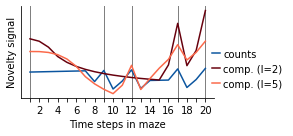

In [18]:
# Plot novelty signals of leaky vs. non-leaky along path [sketch for RLDM abstract]
f,ax = plot_nov(rec_all,labels,cols,'nor',plot_field='nov_s_new',mark_points=mark_points,figsize=(4.5,2))
f.tight_layout()
path_fig = f'{base_path}output/off_policy_predictions/'
sl.make_long_dir(path_fig)
name_fig = f'RLDM2025_comp-cnov-snov_trace-nocenter_{ut}' + ('' if ut=='var' else f'-{ka}')
f.savefig(os.path.join(path_fig,f'{name_fig}.svg'))

## Leaky vs. non-leaky models (MB)

/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env = env.append(add,ignore_index=True)
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env = env.append(add,ignore_index=True)
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env = env.append(add,ignore_index=True)
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env = env.append(add,ignore_index=True)
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarn

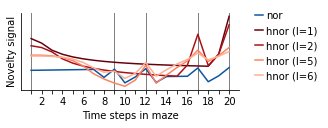

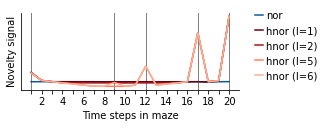

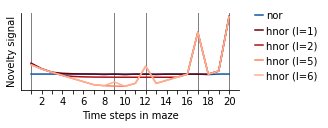

In [19]:
####### nor/nac/hyb model: off-policy (comp. with nor) ###################
k_alph = [1, 0.9, 0.5]
update_type = ['var','fix','fix']

for ka, ut in zip(k_alph,update_type):
    hlevels = [1,2,5,6]
    comp_algs = ['nor'] + ['hnor']*len(hlevels)
    labels = ['nor'] + [f'hnor (l={h})' for h in hlevels]
    cols = [vis.prep_cmap(name='Blues',num=len(np.arange(1,7)))[1]] + [vis.prep_cmap(name='Reds',num=len(np.arange(1,7)))[ii-1] for ii in hlevels]

    rec_all = []
    for ii, cc in enumerate(comp_algs):
        if cc=='nor':
            # Load default parameters for nor model
            params = bpo.base_params_mbnortree_exp.copy()
            params_surnor = import_params_surnor(path=f'{base_path}src/models/mb_agent/')
            params.update(params_surnor)

            # Simulate leaky nor model (off-policy) + extract novelty signals
            params['k_alph'] = ka
            rec_nor, _ = offpolicy_nor(params,sequence,rec_counts=True)
            rec_all.append(rec_nor)

        elif cc=='hnor':
            # Load default parameters for nor model
            params = bpo.baseparams_h1mbnor([hlevels[ii-1]],notrace=False,center=False,center_type='box',update_type=None)
            params_surnor = import_params_surnor(path=f'{base_path}src/models/mb_agent/')
            params.update(params_surnor)

            # Simulate leaky nor model (off-policy) + extract novelty signals
            params['k_alph'] = ka
            params['h']['k_alph'] = ka
            params['h']['update_type'] = ut
            rec_nor, _ = offpolicy_nor(params,sequence,rec_weights=False)
            rec_all.append(rec_nor)

    # Plot novelty signals of leaky vs. non-leaky along path
    f,ax = plot_nov(rec_all,labels,cols,'nor',plot_field='nov_s_new',mark_points=mark_points)
    
    f.tight_layout()
    path_fig = f'{base_path}output/off_policy_predictions/'
    sl.make_long_dir(path_fig)
    name_fig = f'comp-cnov-snov_trace-nocenter_{ut}' + ('' if ut=='var' else f'-{ka}')
    f.savefig(os.path.join(path_fig,f'{name_fig}.svg'))

/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env = env.append(add,ignore_index=True)
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env = env.append(add,ignore_index=True)
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env = env.append(add,ignore_index=True)
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env = env.append(add,ignore_index=True)
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarn

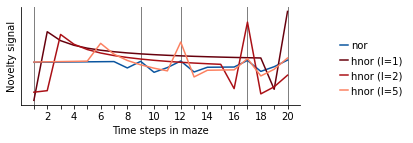

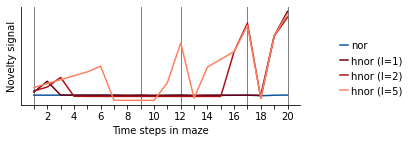

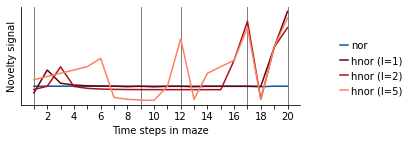

In [20]:
####### nor/nac/hyb model: off-policy (comp. with nor) ###################
k_alph = [1, 0.9, 0.5]
update_type = ['var','fix','fix']

for ka, ut in zip(k_alph,update_type):
    hlevels = [1,2,5]
    comp_algs = ['nor'] + ['hnor']*len(hlevels)
    labels = ['nor'] + [f'hnor (l={h})' for h in hlevels]
    cols = [vis.prep_cmap(name='Blues',num=len(np.arange(1,7)))[1]] + [vis.prep_cmap(name='Reds',num=len(np.arange(1,7)))[ii-1] for ii in hlevels]

    rec_all = []
    for ii, cc in enumerate(comp_algs):
        if cc=='nor':
            # Load default parameters for nor model
            params = bpo.base_params_mbnortree_exp.copy()
            params_surnor = import_params_surnor(path=f'{base_path}src/models/mb_agent/')
            params.update(params_surnor)

            # Simulate leaky nor model (off-policy) + extract novelty signals
            params['k_alph'] = ka
            rec_nor, _ = offpolicy_nor(params,sequence,rec_counts=True)
            rec_all.append(rec_nor)

        elif cc=='hnor':
            # Load default parameters for nor model
            params = bpo.baseparams_h1mbnor([hlevels[ii-1]],notrace=True,center=False,center_type='box',update_type=None)
            params_surnor = import_params_surnor(path=f'{base_path}src/models/mb_agent/')
            params.update(params_surnor)

            # Simulate leaky nor model (off-policy) + extract novelty signals
            params['k_alph'] = ka
            params['h']['k_alph'] = ka
            params['h']['update_type'] = ut
            rec_nor, _ = offpolicy_nor(params,sequence,rec_weights=False)
            rec_all.append(rec_nor)

    # Plot novelty signals of leaky vs. non-leaky along path
    plot_nov(rec_all,labels,cols,'nor',plot_field='nov_s_new',mark_points=mark_points)

/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env = env.append(add,ignore_index=True)
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env = env.append(add,ignore_index=True)
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env = env.append(add,ignore_index=True)
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env = env.append(add,ignore_index=True)
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarn

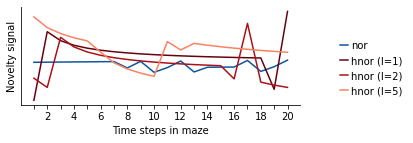

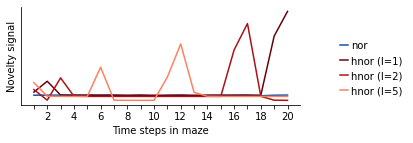

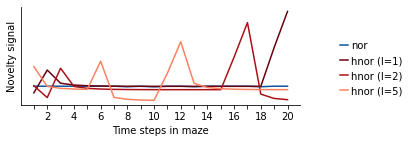

In [21]:
####### nor/nac/hyb model: off-policy (comp. with nor) ###################
k_alph = [1, 0.9, 0.5]
update_type = ['var','fix','fix']

for ka, ut in zip(k_alph,update_type):
    hlevels = [1,2,5]
    comp_algs = ['nor'] + ['hnor']*len(hlevels)
    labels = ['nor'] + [f'hnor (l={h})' for h in hlevels]
    cols = [vis.prep_cmap(name='Blues',num=len(np.arange(1,7)))[1]] + [vis.prep_cmap(name='Reds',num=len(np.arange(1,7)))[ii-1] for ii in hlevels]

    rec_all = []
    for ii, cc in enumerate(comp_algs):
        if cc=='nor':
            # Load default parameters for nor model
            params = bpo.base_params_mbnortree_exp.copy()
            params_surnor = import_params_surnor(path=f'{base_path}src/models/mb_agent/')
            params.update(params_surnor)

            # Simulate leaky nor model (off-policy) + extract novelty signals
            params['k_alph'] = ka
            rec_nor, _ = offpolicy_nor(params,sequence,rec_counts=True)
            rec_all.append(rec_nor)

        elif cc=='hnor':
            # Load default parameters for nor model
            params = bpo.baseparams_h1mbnor([hlevels[ii-1]],notrace=True,center=True,center_type='box',update_type=None)
            params_surnor = import_params_surnor(path=f'{base_path}src/models/mb_agent/')
            params.update(params_surnor)

            # Simulate leaky nor model (off-policy) + extract novelty signals
            params['k_alph'] = ka
            params['h']['k_alph'] = ka
            params['h']['update_type'] = ut
            rec_nor, _ = offpolicy_nor(params,sequence,rec_weights=False)
            rec_all.append(rec_nor)

    # Plot novelty signals of leaky vs. non-leaky along path
    plot_nov(rec_all,labels,cols,'nor',plot_field='nov_s_new')

/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env = env.append(add,ignore_index=True)
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env = env.append(add,ignore_index=True)
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env = env.append(add,ignore_index=True)
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env = env.append(add,ignore_index=True)
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarn

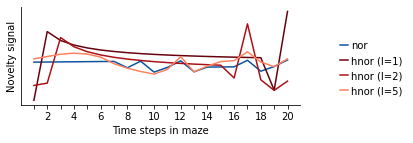

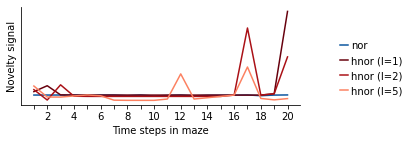

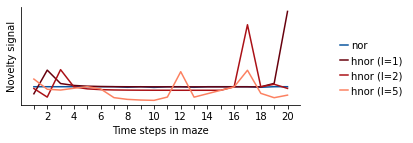

In [22]:
####### nor/nac/hyb model: off-policy (comp. with nor) ###################
k_alph = [1, 0.9, 0.5]
update_type = ['var','fix','fix']

for ka, ut in zip(k_alph,update_type):
    hlevels = [1,2,5]
    comp_algs = ['nor'] + ['hnor']*len(hlevels)
    labels = ['nor'] + [f'hnor (l={h})' for h in hlevels]
    cols = [vis.prep_cmap(name='Blues',num=len(np.arange(1,7)))[1]] + [vis.prep_cmap(name='Reds',num=len(np.arange(1,7)))[ii-1] for ii in hlevels]

    rec_all = []
    for ii, cc in enumerate(comp_algs):
        if cc=='nor':
            # Load default parameters for nor model
            params = bpo.base_params_mbnortree_exp.copy()
            params_surnor = import_params_surnor(path=f'{base_path}src/models/mb_agent/')
            params.update(params_surnor)

            # Simulate leaky nor model (off-policy) + extract novelty signals
            params['k_alph'] = ka
            rec_nor, _ = offpolicy_nor(params,sequence,rec_counts=True)
            rec_all.append(rec_nor)

        elif cc=='hnor':
            # Load default parameters for nor model
            params = bpo.baseparams_h1mbnor([hlevels[ii-1]],notrace=False,center=True,center_type='triangle',update_type=None)
            params_surnor = import_params_surnor(path=f'{base_path}src/models/mb_agent/')
            params.update(params_surnor)

            # Simulate leaky nor model (off-policy) + extract novelty signals
            params['k_alph'] = ka
            params['h']['k_alph'] = ka
            params['h']['update_type'] = ut
            rec_nor, _ = offpolicy_nor(params,sequence,rec_weights=False)
            rec_all.append(rec_nor)

    # Plot novelty signals of leaky vs. non-leaky along path
    plot_nov(rec_all,labels,cols,'nor',plot_field='nov_s_new')

# Tree visualization

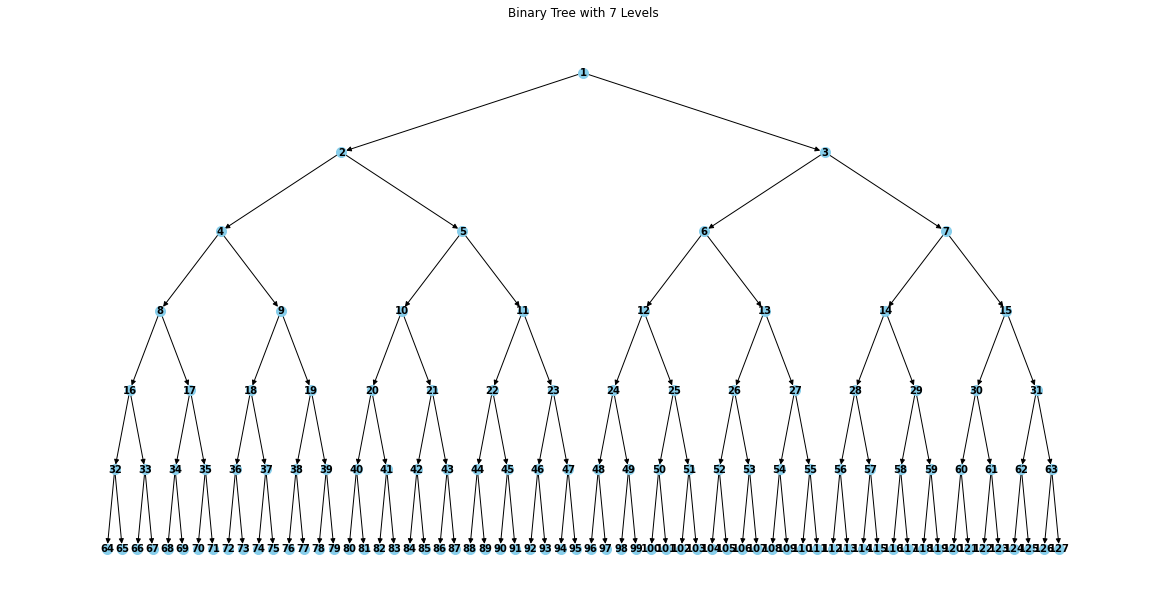

In [23]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_tree(levels, annotate=False):
    G = nx.DiGraph()
    labels = {}
    pos = {}
    
    def add_edges_and_labels(node, level, pos_x, pos_y, x_offset):
        if level < levels:
            left_child = 2 * node
            right_child = 2 * node + 1
            G.add_edge(node, left_child)
            G.add_edge(node, right_child)
            labels[left_child] = str(left_child)
            labels[right_child] = str(right_child)
            pos[left_child] = (pos_x - x_offset, pos_y - 1)
            pos[right_child] = (pos_x + x_offset, pos_y - 1)
            add_edges_and_labels(left_child, level + 1, pos_x - x_offset, pos_y - 1, x_offset / 2)
            add_edges_and_labels(right_child, level + 1, pos_x + x_offset, pos_y - 1, x_offset / 2)
    
    root = 1
    labels[root] = str(root)
    pos[root] = (0, 0)
    add_edges_and_labels(root, 1, 0, 0, 2 ** (levels - 2))
    
    plt.figure(figsize=(16, 8))
    nx.draw(G, pos, with_labels=False, node_size=100, node_color='skyblue', font_size=10, font_color='black')
    if annotate:
        nx.draw_networkx_labels(G, pos, labels, font_size=10, font_color='black', font_weight='bold')
    plt.title(f'Binary Tree with {levels} Levels')
    plt.show()
    

# Plot a binary tree with 6 levels
plot_tree(levels=7, annotate=True)

# Path visualization (Figure 3D)

/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env = env.append(add,ignore_index=True)
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env = env.append(add,ignore_index=True)
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env = env.append(add,ignore_index=True)
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env = env.append(add,ignore_index=True)
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarn

Both a random seed and fixed reward location provided. Environment is initialized with fixed reward location.
[0, 1, 2, 4, 8, 16, 32, 64, 32, 65, 32, 16, 33, 16, 8, 4, 2, 5, 2, 1, 3]


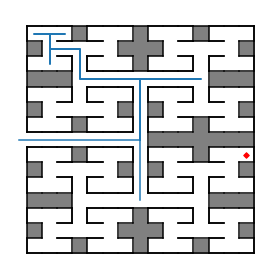

In [24]:
# Make binary tree
mytree = tree.make_rtree_env(6,1234)
xr, Pr, Rr, Tr = tree.tree_df2list(mytree)
_,_,coo = hn.assign_coor_eucl(mytree)

# Make kernel hierarchy
tr, mp, mp_matrix = hn.assign_av(mytree) 

# Plot basic maze 
fig,ax = plt.subplots(1,1,figsize=(4,4))
fig,ax,nb,pb = hn.plot_maze3(mytree,fig=fig,ax=ax,plot_state=False) 

# Plot path
mytree1, mp, mp_mat = hn.assign_coor_eucl(mytree)
states_path = [ii for ii in sequence['state'].values] + [sequence['next_state'].values[-1]]
print(states_path)
x_path = [mytree1.loc[mytree1.state==ii,'x_eucl'].values for ii in states_path]
y_path = [mytree1.loc[mytree1.state==ii,'y_eucl'].values for ii in states_path]

r = ax.plot(x_path,y_path,'-')

/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env = env.append(add,ignore_index=True)
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env = env.append(add,ignore_index=True)
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env = env.append(add,ignore_index=True)
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  env = env.append(add,ignore_index=True)
/Users/sbecker/Projects/sim_nov/src/utils/tree_env.py:21: FutureWarn

Both a random seed and fixed reward location provided. Environment is initialized with fixed reward location.
0.0625


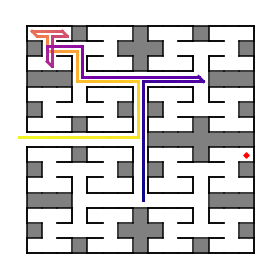

In [25]:
import matplotlib.collections as mcoll
import matplotlib.path as mpath

 # Make binary tree
mytree = tree.make_rtree_env(6,1234)
xr, Pr, Rr, Tr = tree.tree_df2list(mytree)
_,_,coo = hn.assign_coor_eucl(mytree)

# Make kernel hierarchy
tr, mp, mp_matrix = hn.assign_av(mytree) 

# Get plot coordinates of example path
mytree1, mp, mp_mat = hn.assign_coor_eucl(mytree)
states_path = [ii for ii in sequence['state'].values] + [sequence['next_state'].values[-1]]
x_path = [mytree1.loc[mytree1.state==ii,'x_eucl'].values[0] for ii in states_path]
y_path = [mytree1.loc[mytree1.state==ii,'y_eucl'].values[0] for ii in states_path]

xdiff = np.abs(np.diff(x_path))
ydiff = np.abs(np.diff(y_path))
prec_plot = np.min(list(xdiff[xdiff!=0])+list(ydiff[ydiff!=0]))/2
print(prec_plot)

# Put intermediate points for color gradient
x_path_plot = []; y_path_plot = []
prec_plot = 0.05
prec_round = 2
offsets = [0.02] + [-0.02]*6 + [0.02]*2 + [-0.02] + [0.02]*2 + [-0.02] + [0.02]*4 + [-0.02] + [0.02]*2
# np.linspace(-0.04,0.04,num=len(x_path))
offset_pre = 0
for ii, (xx1,xx2,yy1,yy2) in enumerate(zip(x_path[:-1],x_path[1:],y_path[:-1],y_path[1:])):
    offset_curr = offsets[ii]
    if ii<len(x_path)-2:
        offset_next = offsets[ii+1]
    else:
        offset_next = 0
    # print(ii)
    if xx1!=xx2:
        # print(f'x1: {xx1}')
        # print(f'x2: {xx2}')
        xadd = list(np.linspace(xx1+offset_pre,xx2+offset_next,num=5))
        # xadd.append(xx2)
        # prec_plot_ii = np.sign(xx2-xx1)*prec_plot
        # print(f'prec_plot_ii: {prec_plot_ii}')
        # xadd = list(np.round(np.arange(xx1,xx2,prec_plot_ii),prec_round))
        # if xadd[-1]!=xx2: 
        #     xadd.append(xx2)
        yadd = [yy1+offset_curr]*len(xadd)
    elif yy1!=yy2:
        # print(f'y1: {yy1}')
        # print(f'y2: {yy2}')
        yadd = list(np.linspace(yy1+offset_pre,yy2+offset_next,num=5))
        # yadd.append(yy2)
        # prec_plot_ii = np.sign(yy2-yy1)*prec_plot
        # print(f'prec_plot_ii: {prec_plot_ii}')
        # yadd = list(np.round(np.arange(yy1,yy2,prec_plot),prec_round))
        # print(f'yadd: {yadd}')
        # if yadd[-1]!=yy2: yadd.append(yy2)
        xadd = [xx1+offset_curr]*len(yadd)
    x_path_plot.extend(xadd)
    y_path_plot.extend(yadd)

    offset_pre = offset_curr

MAP = 'plasma'
NPOINTS = len(x_path_plot)

fig,ax = plt.subplots(1,1,figsize=(4,4))
fig,ax,nb,pb = hn.plot_maze3(mytree,fig=fig,ax=ax,plot_state=False) 
cm = plt.get_cmap(MAP)
# ax.scatter(x_path_plot[0],y_path_plot[0],c=cm.to_rgba(0))
# ax.scatter(x_path_plot[-1],y_path_plot[-1],c=cm.to_rgba(1))
ax.set_prop_cycle(color=[cm(1.0*i/(NPOINTS-1)) for i in range(NPOINTS-1)][::-1])
for i in range(NPOINTS-1):
    ax.plot(x_path_plot[i:i+2],y_path_plot[i:i+2],lw=3)

fig.tight_layout()
name_fig = f'comp-cnov-snov_samplepath'
fig.savefig(os.path.join(path_fig,f'{name_fig}.svg'))